# Họ tên: Nguyễn Phú Thành - MSSV: 18110014
# Bài tập thực hành Nhập môn máy học - 02

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
class LinearReg:
    @staticmethod
    def getBatches(X, y, batch_size = 10):
        sample_size = X.shape[0]

        for i in range(0, sample_size, batch_size):
            batch_X, batch_y = X[i:(i+batch_size), :], y[i:(i+batch_size)]
            yield batch_X, batch_y

    @classmethod
    def MSE(cls, theta, X, y):
        y_predict = X.dot(theta)
        number_sample = X.shape[0]
        loss = (1/(2 * number_sample) * (y_predict - y).T.dot(y_predict - y)).item()
        return loss

    def __init__(self, nb_epoch, batch_size = None, learning_rate = 1e-3):
        '''
            LinearReg's constructor
            ------------------------------
            Parameters:
                nb_epoch: int
                    Number of epoches
                batch_size: int, default None
                    If batch_size is None then perform Batch Gradient Descent
                    If batch_size == 1 then perform Stochastic Gradient Descent
                    If batch_size > 1 then perform Mini Batch Gradient Descent
                learning_rate: float, default 1e-3
        '''
        self.epoch, self.batch_size, self.rate = nb_epoch, batch_size, learning_rate

        # Define MSE loss function and its gradient
        
        self.loss_function = lambda theta, batch_X, batch_y: (
            1/(2 * batch_X.shape[0]) * (batch_X.dot(theta) - batch_y).T.dot(batch_X.dot(theta) - batch_y)
        ).item()
        
        self.gradient = lambda theta, batch_X, batch_y: 1/(batch_X.shape[0]) * (
            batch_X.T.dot(batch_X.dot(theta) - batch_y)
        )
        
        self.theta = None

    def fit(self, X, y, init_theta = None, random_state = 0):
        '''
            Fit linear model
            ----------------------------
            Parameters:
                X: np.ndarray of shape (sample_size, dimension)
                    Training data
                y: np.ndarray of shape (sample_size, 1)
                    Target values
                init_theta: np.ndarray of shape (dimension, 1), default None
                    Initial value for theta
                    If None, initial value for theta will be chosen by normal distribution N(0, 1)
                random_stae: int, default 0
                    Random state to set initial theta and to shuffle data for each epoch
            ----------------------------
            Returns: np.ndarray
                MSE loss history for each update
        '''
        rnd = np.random.RandomState(random_state)
        X = X.copy()
        y = y.reshape((y.shape[0], 1))
        sample_size, dimension = X.shape[:2]

        if init_theta is None:
            self.theta = rnd.normal(loc = 0, scale = 1, size = dimension).reshape((dimension, 1))
        else:
            self.theta = init_theta.copy()

        # If it is BGD (batch_size = None) then not shuffle else shuffle dataset
        shuffle = True
        if self.batch_size == None:
            self.batch_size = sample_size
            shuffle = False
        
        # Save MSE loss for each update
        loss_history = []

        for i in range(self.epoch):
            if shuffle:
                # Stack X and y horizontally
                data = np.hstack((X, y))
                # Shuffle inplace
                rnd.shuffle(data)
                # Get back X, y after shuffle
                X, y = data[:, :dimension], data[:, dimension:]

            for batch_X, batch_y in LinearReg.getBatches(X, y, batch_size = self.batch_size):
                # Update theta
                self.theta = self.theta - self.rate * self.gradient(self.theta, batch_X, batch_y)
                
                loss = self.loss_function(self.theta, batch_X, batch_y)
                loss_history.append(loss)
        return np.array(loss_history)

    def predict(self, X):
        '''
            Predict using the linear model.
            ---------------------
            Parameters:
                X: np.ndarray
                    Samples
            ---------------------
            Returns: np.ndarray
        '''
        
        assert self.theta is not None, 'Model needs to fit to a training set before making prediction'
        
        if len(X.shape) == 1: # Predict one sample
            dimension, = X.shape
            X = X.reshape((1, dimension))
        predict_y = X.dot(self.theta)

        return predict_y

In [3]:
data = pd.read_csv('Fish.csv')

In [4]:
data.head(n = 5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
data.tail(n = 5)

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
data.shape

(159, 7)

## 1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo Height trong data fish

In [7]:
X = data[['Height']].to_numpy()
y = data[['Weight']].to_numpy()

In [8]:
X = np.hstack(
    (
        np.ones((X.shape[0], 1)),
        X
    )
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
X_train.shape

(127, 2)

## Stochastic Gradient Descent

In [11]:
SGD = LinearReg(nb_epoch = 1000, batch_size = 1, learning_rate = 0.01)

In [12]:
history = SGD.fit(X_train, y_train, random_state = 1)

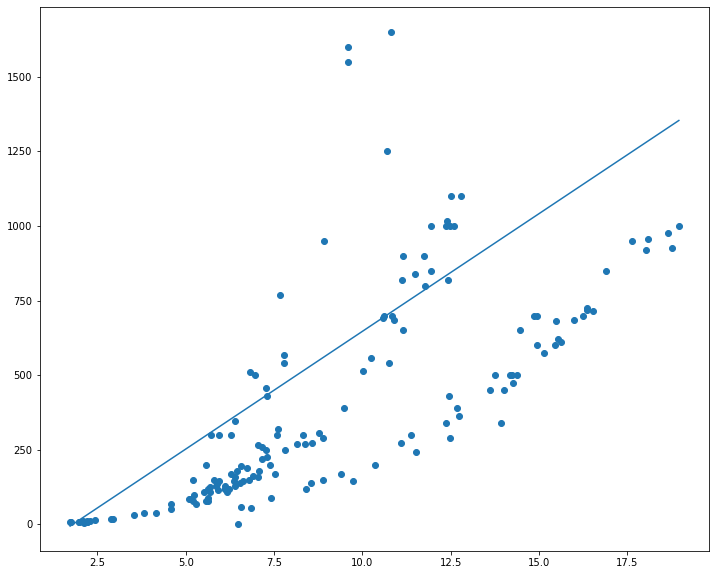

In [13]:
temp = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num = 1000)
fig, ax = plt.subplots(figsize = (12, 10))
ax.scatter(X[:, 1], y)
ax.plot(
    temp, 
    SGD.predict(
        np.hstack(
            (
                np.ones((temp.shape[0], 1)),
                temp.reshape(temp.shape[0], 1)
            )
        )
    )
)

## Mini Batch Gradient Descent

In [14]:
MBGD = LinearReg(nb_epoch = 32000, batch_size = 32, learning_rate = 0.01)

In [15]:
history = MBGD.fit(X_train, y_train, random_state = 1)

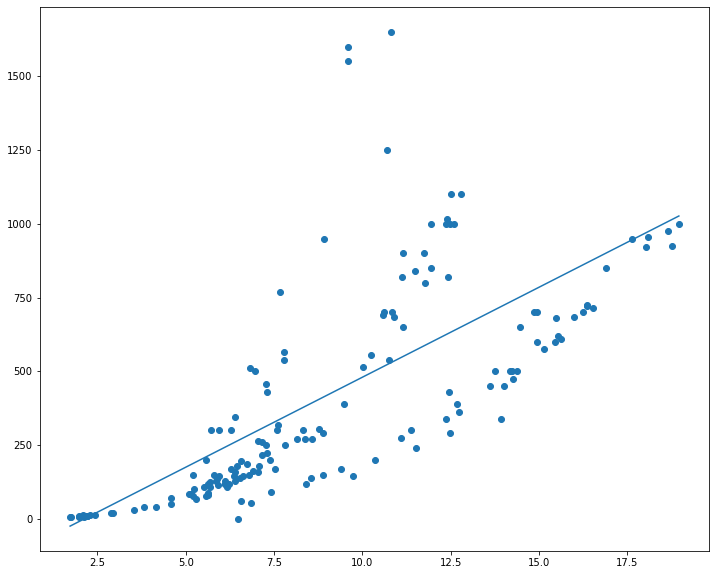

In [16]:
temp = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num = 1000)
fig, ax = plt.subplots(figsize = (12, 10))
ax.scatter(X[:, 1], y)
ax.plot(
    temp, 
    MBGD.predict(
        np.hstack(
            (
                np.ones((temp.shape[0], 1)),
                temp.reshape(temp.shape[0], 1)
            )
        )
    )
)

In [17]:
summary_table = pd.DataFrame(
    data = {
            'Stochastic Gradient Descent': (
                LinearReg.MSE(SGD.theta, X_train, y_train),
                LinearReg.MSE(SGD.theta, X_test, y_test),                
            ),
            'Mini Batch Gradient Descent': (
                LinearReg.MSE(MBGD.theta, X_train, y_train),
                LinearReg.MSE(MBGD.theta, X_test, y_test),                
            )
           },
    index = ('MSE loss on training dataset', 'MSE loss on testing dataset')
)

In [18]:
summary_table

,Stochastic Gradient Descent,Mini Batch Gradient Descent
MSE loss on training dataset,47757.011938,30932.934541
MSE loss on testing dataset,45804.299603,28540.969367


## 2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo Height và Width trong data fish

In [19]:
X = data[['Height', 'Width']].to_numpy()
y = data[['Weight']].to_numpy()

In [20]:
X = np.hstack(
    (
        np.ones((X.shape[0], 1)),
        X
    )
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
X_train.shape

(127, 3)

In [23]:
# Khởi tạo cùng theta để so sánh 3 thuật toán
theta_0 = np.array([0.25, 0.5, 0.75]).reshape((3, 1))

## Batch Gradient Descent

In [24]:
BGD = LinearReg(nb_epoch = 127000, batch_size = None, learning_rate = 0.01)

In [25]:
history = BGD.fit(X_train, y_train, init_theta = theta_0, random_state = 1)

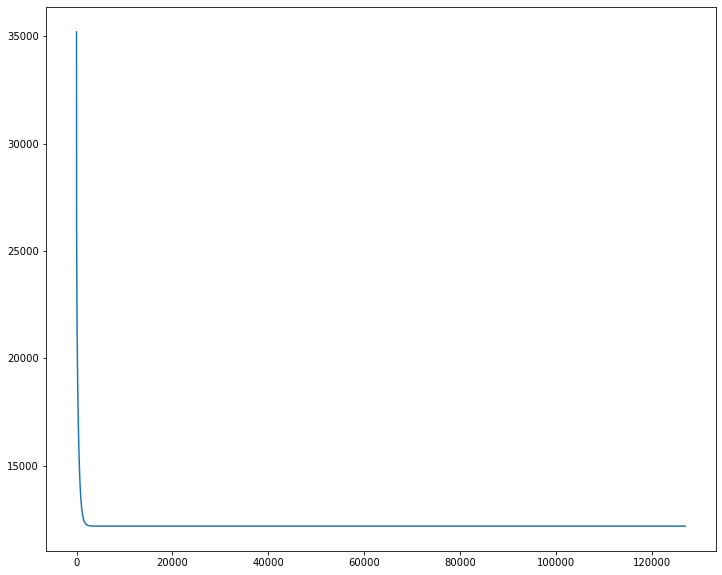

In [26]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.plot(history)

## Stochastic Gradient Descent

In [27]:
SGD = LinearReg(nb_epoch = 1000, batch_size = 1, learning_rate = 0.01)

In [28]:
history = SGD.fit(X_train, y_train, init_theta = theta_0, random_state = 1)

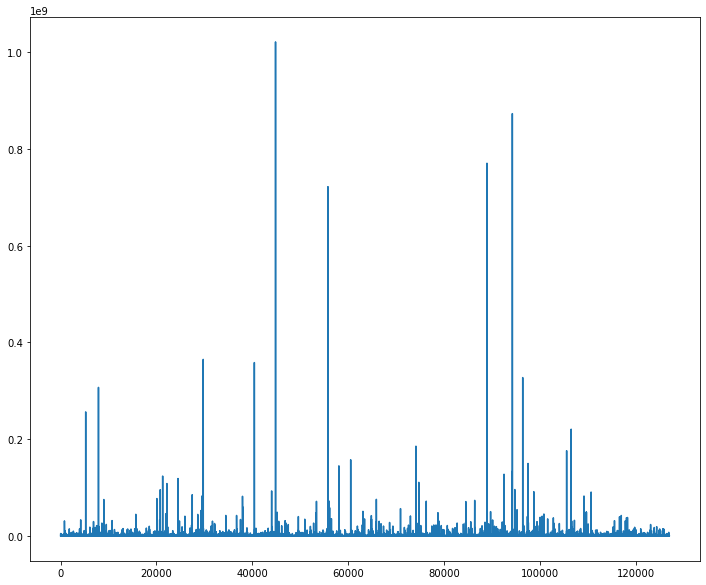

In [29]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.plot(history)

## Mini Batch Gradient Descent

In [30]:
MBGD = LinearReg(nb_epoch = 32000, batch_size = 32, learning_rate = 0.01)

In [31]:
history = MBGD.fit(X_train, y_train, init_theta = theta_0, random_state = 1)

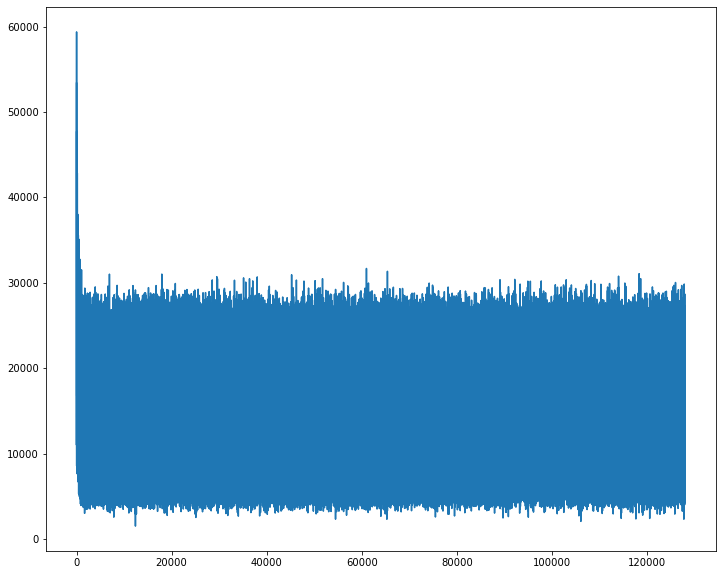

In [32]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.plot(history)

## 3. Cho biết Weights tốt nhất cho các mô hình trên

In [33]:
summary_table = pd.DataFrame(
    data = {
            'Batch Gradient Descent': (
                LinearReg.MSE(BGD.theta, X_train, y_train),
                LinearReg.MSE(BGD.theta, X_test, y_test),
            ),
            'Stochastic Gradient Descent': (
                LinearReg.MSE(SGD.theta, X_train, y_train),
                LinearReg.MSE(SGD.theta, X_test, y_test),                
            ),
            'Mini Batch Gradient Descent': (
                LinearReg.MSE(MBGD.theta, X_train, y_train),
                LinearReg.MSE(MBGD.theta, X_test, y_test),                
            )
           },
    index = ('MSE loss on training dataset', 'MSE loss on testing dataset')
)

In [34]:
summary_table

,Batch Gradient Descent,Stochastic Gradient Descent,Mini Batch Gradient Descent
MSE loss on training dataset,12191.550860,617749.920828,12528.968513
MSE loss on testing dataset,19231.487049,557513.788345,19833.876521


## Nhận thấy trọng số cho bởi Batch Gradient Descent có MSE Loss nhỏ nhất trên tập test trong cả 3 thuật toán. Do đó ta chọn Weights của BGD

In [35]:
BGD.theta

array([[-415.4812046 ],
       [   1.63051922],
       [ 181.33412414]])